In [1]:
# Step 1: Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a synthetic Titanic dataset
data = {
    "PassengerID": range(1, 101),
    "Survived": np.random.choice([0, 1], size=100, p=[0.6, 0.4]),
    "Pclass": np.random.choice([1, 2, 3], size=100, p=[0.2, 0.3, 0.5]),
    "Name": [f"Passenger {i}" for i in range(1, 101)],
    "Sex": np.random.choice(["male", "female"], size=100, p=[0.5, 0.5]),
    "Age": np.random.randint(1, 80, size=100),
    "SibSp": np.random.randint(0, 4, size=100),
    "Parch": np.random.randint(0, 3, size=100),
    "Ticket": [f"TCKT-{np.random.randint(1000, 9999)}" for _ in range(100)],
    "Fare": np.round(np.random.uniform(10, 500, size=100), 2),
    "Embarked": np.random.choice(["C", "Q", "S"], size=100, p=[0.3, 0.2, 0.5]),
}

titanic_df = pd.DataFrame(data)

# Display the first few rows of the dataset
titanic_df.head()


,PassengerID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Passenger 1,male,50,3,1,TCKT-4787,125.52,S
1,2,1,2,Passenger 2,female,3,3,0,TCKT-6459,54.72,C
2,3,0,3,Passenger 3,male,37,3,1,TCKT-5052,276.95,Q
3,4,1,2,Passenger 4,female,28,0,1,TCKT-5265,252.28,C
4,5,0,3,Passenger 5,male,58,0,2,TCKT-6539,113.49,S


In [2]:
# Step 2: Handle Missing Values
# Check for missing values
titanic_df.isnull().sum()

,0
PassengerID,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [3]:
# Step 3: Generate Descriptive Statistics
# Summary statistics for numerical columns
descriptive_stats = titanic_df.describe()
print("Descriptive Statistics for Numerical Columns:")
print(descriptive_stats)

# Frequency distribution for categorical columns
categorical_columns = ['Survived', 'Pclass', 'Sex', 'Embarked']
for column in categorical_columns:
    print(f"\nFrequency distribution for {column}:")
    print(titanic_df[column].value_counts())

Descriptive Statistics for Numerical Columns:
       PassengerID    Survived      Pclass         Age       SibSp  \
count   100.000000  100.000000  100.000000  100.000000  100.000000   
mean     50.500000    0.380000    2.220000   42.960000    1.490000   
std      29.011492    0.487832    0.785988   22.420193    1.167705   
min       1.000000    0.000000    1.000000    1.000000    0.000000   
25%      25.750000    0.000000    2.000000   25.000000    0.000000   
50%      50.500000    0.000000    2.000000   43.000000    2.000000   
75%      75.250000    1.000000    3.000000   62.250000    3.000000   
max     100.000000    1.000000    3.000000   79.000000    3.000000   

            Parch        Fare  
count  100.000000  100.000000  
mean     0.910000  263.436700  
std      0.829932  149.313622  
min      0.000000   13.220000  
25%      0.000000  123.595000  
50%      1.000000  262.915000  
75%      2.000000  392.802500  
max      2.000000  497.650000  

Frequency distribution for Survive


Survival Rates by Gender:
Sex
female    0.411765
male      0.346939
Name: Survived, dtype: float64

Survival Rates by Class:
Pclass
1    0.318182
2    0.352941
3    0.431818
Name: Survived, dtype: float64

Survival Rates by Age Group:
AgeGroup
Child          0.300000
Teen           0.500000
Young Adult    0.541667
Adult          0.272727
Senior         0.350000
Name: Survived, dtype: float64


<ipython-input-4-962ad30f7af1>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = titanic_df.groupby('AgeGroup')['Survived'].mean()


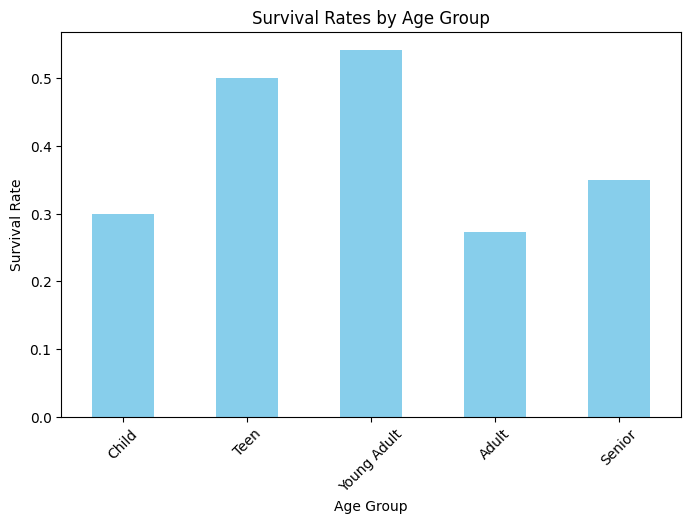

In [4]:
# Step 5: Survival Analysis
# Analyze survival rates by gender
gender_survival = titanic_df.groupby('Sex')['Survived'].mean()
print("\nSurvival Rates by Gender:")
print(gender_survival)

# Analyze survival rates by class
class_survival = titanic_df.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rates by Class:")
print(class_survival)

# Analyze survival rates by age group
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0, 12, 18, 30, 50, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
age_group_survival = titanic_df.groupby('AgeGroup')['Survived'].mean()
print("\nSurvival Rates by Age Group:")
print(age_group_survival)

# Visualize survival rates by age group
plt.figure(figsize=(8, 5))
age_group_survival.plot(kind='bar', color='skyblue')
plt.title('Survival Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()
